<p  style="z-index: 101;background: #fde073;text-align: center;line-height: 2.5;overflow: hidden;font-size:22px;">Please <a href="https://github.com/ECSIM/opem#cite" target="_blank">cite us</a> if you use the software</p>

#  Padulles-Hauer Dynamic Model

### Version 1.2

<ul>
    <li><a href="#Overview">Overview</a></li>
    <li><a href="#Nernst-Voltage">Nernst Voltage</a></li>
    <ul>
        <li><a href="#FC-Voltage">FC Voltage</a></li>
    </ul>
    <li><a href="#Power-of-PEMFC">Power of PEMFC</a></li>
    <li><a href="#Efficiency-of-PEMFC">Efficiency of PEMFC</a></li>
    <li><a href="#Linear-Approximation">Linear Approximation</a></li>
    <li><a href="#Overall-Parameters">Overall Parameters</a></li>
    <li><a href="#Full-Run">Full Run</a></li>
    <li><a href="#Plot">Plot</a></li>
    <li><a href="#Parameters">Parameters</a></li>
    <li><a href="#Reference">Reference</a></li>   
</ul>

## Overview

<p style="text-align:justify;">
The Padulles dynamic model can predict the transient response of cell voltage, temperature of the cell, hydrogen/oxygen out flow rates and cathode and anode channel temperatures/pressures under sudden change in load current. Hence, a dynamic fuel cell simulation is developed in this model, which incorporates the dynamics of flow and pressure in the anode and cathode channels and mass/ heat transfer transient features in the fuel cell body.
<br/>This model is based on several assumptions: 
<ol>    
<li>The stack is fed with hydrogen and air</li>   
<li>Cell temperature is stable at all times</li>   
<li>The ratio of pressures between the interior and exterior of the electrode channels is large</li>  
<li>The channels that transport gases along the electrodes have a fixed volume </li>    
<li>Only source of voltage loss is ohmic polarization</li>     
<li>Nernst equation can be applied too</li> 
</ol>
</p>

<p style="text-align:justify;">
Padulles-Hauer Dynamic Model is a dynamic electrochemical simulation model of a grid independent proton exchange membrane (PEM) fuel cell. This model includes a methanol reformer to generate hydrogen from methanol and the PEM stack. The model is used to predict the output voltage and power of a PEMFC. It has to be noted that the reformer model is a second order transfer function. 
</p>

<div style="text-align:center;">
    
<img src="images/Padulles-Hauer-Diagram.jpg">  
<p style="text-align:center;">Fig1. Padulles-Hauer Dynamic Model Block Diagram </p>
    
</div>

## Nernst Voltage

$$E_{Nernst}=N_0\times [E_0+\frac{RT}{2F}ln(\frac{P_{H_2}\times \sqrt{P_{O_2}}}{P_{H_2O}})]$$

$$P_{H_2}=\frac{\frac{1}{K_{H_2}}}{1+\tau_{H_2}^{(s)}}[(q_{H_2}^{(inlet)}-(2\times K_r \times i)]$$

$$\frac{q_{H_2}^{(inlet)}}{q_{methanol}}=\frac{CV}{\tau_{1}^{(s)}+(\tau_{2}^{(s)})^2+(\tau_{1}+\tau_{2})^{(s)}+1}$$

$$P_{O_2}=\frac{\frac{1}{K_{O_2}}}{1+\tau_{O_2}^{(s)}}[(q_{O_2}^{(inlet)}-(K_r \times i)]$$

$$P_{H_2O}=\frac{\frac{1}{K_{H_2O}}}{1+\tau_{H_2O}^{(s)}}[(q_{H_2O}^{(inlet)}-(2\times K_r \times i)]$$

$$K_r=\frac{N_0}{4F}$$

$$q_{O_2}^{(inlet)}=\frac{q_{H_2}^{(inlet)}}{r_{h-o}}$$

$$q_{H_2O}^{(inlet)}=q_{H_2}^{(inlet)}$$

In [1]:
from opem.Dynamic.Padulles_Hauer import qH2_Calc,Kr_Calc,qO2_Calc,PH2_Calc,PO2_Calc,PH2O_Calc,Enernst_Calc

In [2]:
qH2=qH2_Calc(qMethanol=0.0002,CV=2,t1=2,t2=2)
qH2

3.6363636363636364e-05

In [3]:
Kr=Kr_Calc(N0=5)
Kr

1.2955435375179044e-08

In [4]:
qO2=qO2_Calc(qH2=qH2,rho=1.168)
qO2

3.113325031133251e-05

In [5]:
PH2=PH2_Calc(KH2=0.0000422,tH2=3.37,Kr=Kr,I=1,qH2=qH2)
PH2

0.19704428889827239

In [6]:
PO2=PO2_Calc(KO2=0.0000211,tO2=6.74,Kr=Kr,I=1,qO2=qO2)
PO2

0.1905549730945132

In [7]:
PH2O=PH2O_Calc(KH2O=0.000007716,tH2O=18.418,Kr=Kr,I=1,qH2O=qH2)
PH2O

0.2425275190047356

In [8]:
Enernst=Enernst_Calc(E0=0.6,N0=5,T=343, PH2=PH2, PO2=PO2,PH2O=PH2O)
Enernst

2.9234016588243374

### FC Voltage

$$V_{Fuelcell}=E_{Nernst}-Bln(Ci)-(R^{int}\times i)$$

In [9]:
from opem.Dynamic.Padulles_Hauer import Vcell_Calc
FC_Voltage=Vcell_Calc(Enernst=Enernst, B=0.04777,C=0.0136,I=1,Rint=0.00303)
FC_Voltage

3.1256720945020287

## Power of PEMFC

$$P=V_{cell}\times i$$

$$P_{Thermal}=i\times(N \times E_{th}-V_{Stack})$$

$$E_{th}=\frac{-\Delta H}{nF}=1.23V$$

In [10]:
from opem.Dynamic.Padulles_Hauer import Power_Calc,Power_Thermal_Calc
Power=Power_Calc(Vcell=FC_Voltage,i=2)
Power

6.251344189004057

In [11]:
Power_Thermal_Calc(VStack=FC_Voltage,N=5,i=2)

6.048655810995943

## Efficiency of PEMFC

$$\eta=\frac{\mu_F\times V_{Fuelcell}}{N_0\times HHV}$$

In [12]:
from opem.Dynamic.Padulles_Hauer import Efficiency_Calc
Efficiency_Calc(Vcell=FC_Voltage,N=5)

0.40072719160282416

## Linear Approximation

Sometimes quick calculations regarding fuel cell efficiency–power-size relationships need to be made. Linear approximation is a good method to find a rough estimate of the value of polarization function at a particular point. A linear polarization curve has the following form:
$$V_{cell}=V_0-kI$$
where V0 is the intercept (actual open circuit voltage is always higher) and k is the slope of the curve.

* Notice : <a href="https://en.wikipedia.org/wiki/Simple_linear_regression">Simple linear regression</a> used for this approximation

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$V_0$$</td>
        <td style="text-align:center;">Intercept of the curve obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
    <tr>
        <td>$$k$$</td>
        <td style="text-align:center;">Slope of the curve obtained by linear approximation</td>
        <td>$$A^{-1}$$</td>
    </tr>
    <tr>
        <td>$$P_{max}$$</td>
        <td style="text-align:center;">Maximum power obtained by linear approximation</td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : These parameters are only available in HTML report

## Overall Parameters

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$\eta|P_{Max}$$</td>
        <td style="text-align:center;">Cell efficiency at maximum power</td>
        <td>$$--$$</td>
    </tr>
    <tr>
        <td>$$P_{Max}$$</td>
        <td style="text-align:center;">Maximum power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Elec} $$</td>
        <td style="text-align:center;">Total electrical power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Thermal} $$</td>
        <td style="text-align:center;">Total thermal power   </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{Max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power </td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : P(Thermal) & P(Elec) calculated by <a href="https://en.wikipedia.org/wiki/Simpson%27s_rule">Simpson's Rule</a>

* Notice : These parameters are only available in HTML report

## Full Run

* Run from `i`=0.1 to `i`=100 with `step`=0.1

In [13]:
Test_Vector = {
    "T": 343,
    "E0": 0.6,
    "N0": 5,
    "KO2": 0.0000211,
    "KH2": 0.0000422,
    "KH2O": 0.000007716,
    "tH2": 3.37,
    "tO2": 6.74,
    "t1": 2,
    "t2": 2,
    "tH2O": 18.418,
    "B": 0.04777,
    "C": 0.0136,
    "Rint": 0.00303,
    "rho": 1.168,
    "qMethanol": 0.0002,
    "CV": 2,
    "i-start": 0.1,
    "i-stop": 100,
    "i-step": 0.1,
    "Name": "Padulles_Hauer_Test"}


* Notice : "Name", new in version 0.5

In [14]:
from opem.Dynamic.Padulles_Hauer import Dynamic_Analysis
data=Dynamic_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=True)

###########
Padulles-Hauer-Model Simulation
###########
Analyzing . . .
I : 0.1
E : 2.9234154992732004 V
FC Efficiency : 0.41518043908246366 
FC Power : 0.3238407424843217 W
FC Voltage : 3.2384074248432166 V
PH2 : 0.19717074233280188 atm
PH2O : 0.2426831613626925 atm
PO2 : 0.1906263686382979 atm
Power-Thermal : 0.2911592575156784 W
###########
I : 0.2
E : 2.9234139617015558 V
FC Efficiency : 0.4108963136482338 
FC Power : 0.6409982492912448 W
FC Voltage : 3.204991246456224 V
PH2 : 0.1971566919511875 atm
PH2O : 0.24266586776736396 atm
PO2 : 0.1906184358000996 atm
Power-Thermal : 0.5890017507087553 W
###########
I : 0.3
E : 2.9234124240659227 V
FC Efficiency : 0.4083740564879825 
FC Power : 0.955595292181879 W
FC Voltage : 3.1853176406062635 V
PH2 : 0.19714264156957312 atm
PH2O : 0.24264857417203542 atm
PO2 : 0.1906105029619013 atm
Power-Thermal : 0.889404707818121 W
###########
I : 0.4
E : 2.9234108863662946 V
FC Efficiency : 0.4065731449109761 
FC Power : 1.2685082121222457 W
FC Voltag

I : 20.9
E : 2.923094298882823 V
FC Efficiency : 0.37434088682518973 
FC Power : 61.02505137024243 W
FC Voltage : 2.91985891723648 V
PH2 : 0.19424826295700912 atm
PH2O : 0.23908609353435545 atm
PO2 : 0.18897633829305055 atm
Power-Thermal : 67.50994862975757 W
###########
I : 21.0
E : 2.923092747885725 V
FC Efficiency : 0.3742726085529959 
FC Power : 61.30585328098073 W
FC Voltage : 2.919326346713368 V
PH2 : 0.19423421257539472 atm
PH2O : 0.2390687999390269 atm
PO2 : 0.18896840545485227 atm
Power-Thermal : 67.84414671901928 W
###########
I : 21.1
E : 2.923091196823515 V
FC Efficiency : 0.374204469148382 
FC Power : 61.58657153244072 W
FC Voltage : 2.91879485935738 V
PH2 : 0.19422016219378035 atm
PH2O : 0.23905150634369837 atm
PO2 : 0.18896047261665394 atm
Power-Thermal : 68.1784284675593 W
###########
I : 21.2
E : 2.923089645696188 V
FC Efficiency : 0.37413646729809263 
FC Power : 61.8672062324126 W
FC Voltage : 2.9182644449251227 V
PH2 : 0.19420611181216596 atm
PH2O : 0.239034212748369

PO2 : 0.18756429309375236 atm
Power-Thermal : 128.24339557529265 W
###########
I : 38.8
E : 2.9228156279393493 V
FC Efficiency : 0.3635627344148157 
FC Power : 110.02862594329982 W
FC Voltage : 2.8357893284355624 V
PH2 : 0.19173324464803362 atm
PH2O : 0.23599053997054617 atm
PO2 : 0.18755636025555408 atm
Power-Thermal : 128.59137405670018 W
###########
I : 38.9
E : 2.9228140651994963 V
FC Efficiency : 0.3635079237852384 
FC Power : 110.29557423491705 W
FC Voltage : 2.83536180552486 V
PH2 : 0.19171919426641923 atm
PH2O : 0.23597324637521763 atm
PO2 : 0.18754842741735575 atm
Power-Thermal : 128.93942576508294 W
###########
I : 39.0
E : 2.9228125023935414 V
FC Efficiency : 0.3634531536199512 
FC Power : 110.56244933118916 W
FC Voltage : 2.8349345982356193 V
PH2 : 0.1917051438848048 atm
PH2O : 0.23595595277988904 atm
PO2 : 0.18754049457915747 atm
Power-Thermal : 129.28755066881087 W
###########
I : 39.1
E : 2.9228109395214803 V
FC Efficiency : 0.36339842371166614 
FC Power : 110.8292512635

FC Voltage : 2.774097115209889 V
PH2 : 0.18961163702426098 atm
PH2O : 0.23337920707593607 atm
PO2 : 0.1863585016876101 atm
Power-Thermal : 181.961165490187 W
###########
I : 54.0
E : 2.9225773296772886 V
FC Efficiency : 0.3556030765962313 
FC Power : 149.78001586233262 W
FC Voltage : 2.773703997450604 V
PH2 : 0.1895975866426466 atm
PH2O : 0.23336191348060753 atm
PO2 : 0.18635056884941179 atm
Power-Thermal : 182.3199841376674 W
###########
I : 54.1
E : 2.9225757568254274 V
FC Efficiency : 0.3555526978775574 
FC Power : 150.03612745037168 W
FC Voltage : 2.7733110434449477 V
PH2 : 0.1895835362610322 atm
PH2O : 0.233344619885279 atm
PO2 : 0.18634263601121348 atm
Power-Thermal : 182.67887254962835 W
###########
I : 54.2
E : 2.9225741839066064 V
FC Efficiency : 0.35550234007536546 
FC Power : 150.2921692902615 W
FC Voltage : 2.772918252587851 V
PH2 : 0.18956948587941783 atm
PH2O : 0.23332732628995045 atm
PO2 : 0.18633470317301518 atm
Power-Thermal : 183.0378307097385 W
###########
I : 54.3
E

FC Voltage : 2.6981058494480106 V
PH2 : 0.1868015607013833 atm
PH2O : 0.22992048801022735 atm
PO2 : 0.18477193404794917 atm
Power-Thermal : 255.09497772579206 W
###########
I : 74.0
E : 2.9222614192715763 V
FC Efficiency : 0.3458636750572954 
FC Power : 199.63251324307092 W
FC Voltage : 2.697736665446904 V
PH2 : 0.1867875103197689 atm
PH2O : 0.2299031944148988 atm
PO2 : 0.18476400120975087 atm
Power-Thermal : 255.4674867569291 W
###########
I : 74.1
E : 2.922259832913354 V
FC Efficiency : 0.3458163549503815 
FC Power : 199.8749368342215 W
FC Voltage : 2.697367568612976 V
PH2 : 0.18677345993815453 atm
PH2O : 0.22988590081957025 atm
PO2 : 0.18475606837155256 atm
Power-Thermal : 255.84006316577847 W
###########
I : 74.2
E : 2.922258246487016 V
FC Efficiency : 0.34576904598858027 
FC Power : 200.11729305635077 W
FC Voltage : 2.6969985587109266 V
PH2 : 0.18675940955654013 atm
PH2O : 0.2298686072242417 atm
PO2 : 0.18474813553335426 atm
Power-Thermal : 256.21270694364927 W
###########
I : 74.

I : 93.7
E : 2.9219475842936635 V
FC Efficiency : 0.33672519608604495 
FC Power : 246.09897681144682 W
FC Voltage : 2.6264565294711506 V
PH2 : 0.18401958514173442 atm
PH2O : 0.22649635613517574 atm
PO2 : 0.1832012320846849 atm
Power-Thermal : 330.1560231885532 W
###########
I : 93.8
E : 2.9219459844029707 V
FC Efficiency : 0.3366796121678154 
FC Power : 246.32827144646043 W
FC Voltage : 2.62610097490896 V
PH2 : 0.18400553476012002 atm
PH2O : 0.2264790625398472 atm
PO2 : 0.18319329924648659 atm
Power-Thermal : 330.5417285535396 W
###########
I : 93.9
E : 2.9219443844429955 V
FC Efficiency : 0.3366340352014401 
FC Power : 246.5575000622388 W
FC Voltage : 2.625745474571233 V
PH2 : 0.18399148437850565 atm
PH2O : 0.22646176894451867 atm
PO2 : 0.18318536640828828 atm
Power-Thermal : 330.92749993776124 W
###########
I : 94.0
E : 2.9219427844137327 V
FC Efficiency : 0.33658846517210067 
FC Power : 246.78666266418426 W
FC Voltage : 2.6253900283423857 V
PH2 : 0.18397743399689126 atm
PH2O : 0.226

* Notice : "Status", "V0", "K" and "EFF" , new in version 0.8

In [15]:
data_2=Dynamic_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=False)

###########
Padulles-Hauer-Model Simulation
###########
Analyzing . . .
Done!


* Notice : "PrintMode" & "ReportMode" , new in version 0.5

In [16]:
Dynamic_Analysis(InputMethod={},TestMode=True,PrintMode=False,ReportMode=True)

{'Message': '[Error] Padulles-Hauer Simulation Failed!(Check Your Inputs)',
 'Status': False}

* Notice:

1. `TestMode` : Active test mode and get/return data as `dict`, (Default : `False`)
2. `ReportMode` : Generate reports(`.csv`,`.opem`,`.html`) and print result in console, (Default : `True`)
3. `PrintMode` : Control printing in console, (Default : `True`)

## Plot

In [17]:
import sys
!{sys.executable} -m pip install matplotlib;
import matplotlib.pyplot as plt

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [18]:
def plot_func(x,y,x_label,y_label,color='green',legend=[],multi=False):
    plt.figure()
    plt.grid()
    if multi==True:
        for index,y_item in enumerate(y):
            plt.plot(x,y_item,color=color[index])
    else:
        plt.plot(x,y,color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if len(legend)!=0:
        plt.legend(legend)
    plt.show()


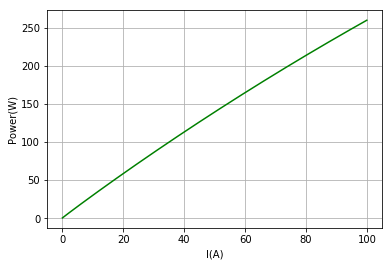

In [19]:
plot_func(data["I"],data["P"],"I(A)","Power(W)")

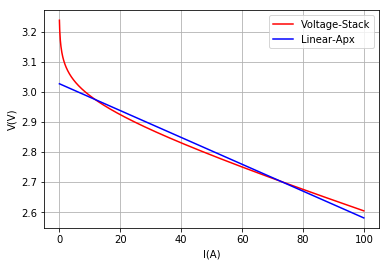

In [20]:
plot_func(data["I"],[data["V"],data["VE"]],"I(A)","V(V)",["red","blue"],legend=["Voltage-Stack","Linear-Apx"],multi=True)

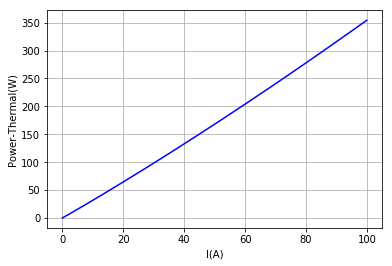

In [21]:
plot_func(data["I"],data["Ph"],"I(A)","Power-Thermal(W)","blue")

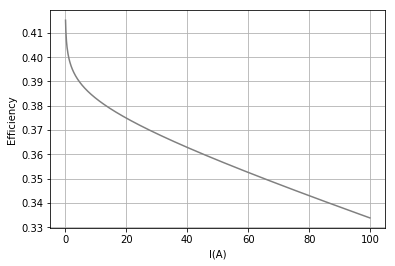

In [22]:
plot_func(data["I"],data["EFF"],"I(A)","Efficiency","gray")

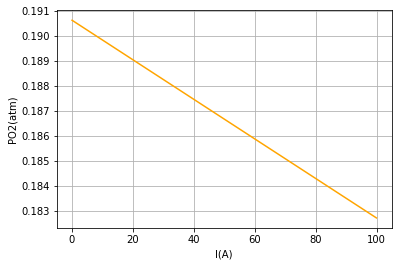

In [23]:
plot_func(data["I"],data["PO2"],"I(A)","PO2(atm)","orange")

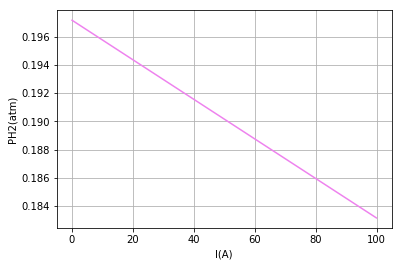

In [24]:
plot_func(data["I"],data["PH2"],"I(A)","PH2(atm)","violet")

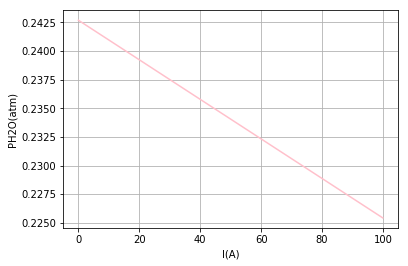

In [25]:
plot_func(data["I"],data["PH2O"],"I(A)","PH2O(atm)","pink")

<a href="Padulles-Hauer/Padulles_Hauer_Test.html">HTML File</a>

<a href="Padulles-Hauer/Padulles_Hauer_Test.opem">OPEM File</a>

<a href="Padulles-Hauer/Padulles_Hauer_Test.csv">CSV File</a>

## Parameters

Inputs, Constants & Middle Values
1. User : User input
2. System : Simulator calculation (middle value)

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
        <td>$$Value$$</td>
    </tr>
     <tr>
        <td>$$T$$</td>
        <td style="text-align:center;">Fuel cell temperature</td>
        <td>$$K$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$N_0$$</td>
        <td style="text-align:center;">Number of cells</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$E_0$$</td>
        <td style="text-align:center;">No load voltage</td>
        <td>$$V$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{H_2}$$</td>
        <td style="text-align:center;">Hydrogen valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{H_2O}$$</td>
        <td style="text-align:center;">Water valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{O_2}$$</td>
        <td style="text-align:center;">Oxygen valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$\tau_{H_2}^{(s)}$$</td>
        <td style="text-align:center;">Hydrogen time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$\tau_{H_2O}^{(s)}$$</td>
        <td style="text-align:center;">Water time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$\tau_{O_2}^{(s)}$$</td>
        <td style="text-align:center;">Oxygen time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$\tau_{1}^{(s)}$$</td>
        <td style="text-align:center;">Reformer time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$\tau_{2}^{(s)}$$</td>
        <td style="text-align:center;">Reformer time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$CV$$</td>
        <td style="text-align:center;">Conversion factor</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$B$$</td>
        <td style="text-align:center;">Activation voltage constant</td>
        <td>$$V$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$C$$</td>
        <td style="text-align:center;">Activation constant parameter</td>
        <td>$$A^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$R^{int}$$</td>
        <td style="text-align:center;">Fuel cell internal resistance</td>
        <td>$$\Omega$$</td>
        <td>$$User$$</td>
    </tr>
      <tr>
        <td>$$r_{h-o}$$</td>
        <td style="text-align:center;">Hydrogen-Oxygen flow ratio</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
       <tr>
        <td>$$q_{methanol}$$</td>
        <td style="text-align:center;">Molar flow of methanol</td>
        <td>$$kmol.s^{-1}$$</td>
        <td>$$User$$</td>
     <tr>
        <td>$$i_{start}$$</td>
        <td style="text-align:center;">Cell operating current start point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_{step}$$</td>
        <td style="text-align:center;">Cell operating current step</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_{stop}$$</td>
        <td style="text-align:center;">Cell operating current end point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$P_{H_2}$$</td>
        <td style="text-align:center;">Hydrogen partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$P_{H_2O}$$</td>
        <td style="text-align:center;">Water partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$P_{O_2}$$</td>
        <td style="text-align:center;">Oxygen partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$K_r$$</td>
        <td style="text-align:center;">Modeling constant</td>
        <td>$$kmol.s^{-1}.A^{-1}$$</td>
        <td>$$System$$</td>
    </tr>
      <tr>
        <td>$$q_{O_2}^{(inlet)}$$</td>
        <td style="text-align:center;">Molar flow of oxygen</td>
        <td>$$kmol.s^{-1}$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$q_{H_2O}^{(inlet)}$$</td>
        <td style="text-align:center;">Molar flow of water</td>
        <td>$$kmol.s^{-1}$$</td>
        <td>$$System$$</td>
    </tr>
    <tr>
        <td>$$q_{H_2}^{(inlet)}$$</td>
        <td style="text-align:center;">Molar flow of hydrogen</td>
        <td>$$kmol.s^{-1}$$</td>
        <td>$$System$$</td>
    </tr>
               <tr>
        <td>$$\mu_F$$</td>
        <td style="text-align:center;">The fuel utilization</td>
        <td>$$--$$</td>
        <td>$$0.95$$</td>
    </tr>
          <tr>
    <td>$$HHV$$</td>
        <td style="text-align:center;">Higher heating value potential</td>
        <td>$$V$$</td>
        <td>$$1.482$$</td>
    </tr>
             <tr>
    <td>$$R$$</td>
        <td style="text-align:center;">Universal gas constant</td>
        <td>$$J.kmol^{-1}.K^{-1}$$</td>
        <td>$$8314.47$$</td>
    </tr>
             <tr>
    <td>$$F$$</td>
        <td style="text-align:center;">Faraday’s constant</td>
        <td>$$C.kmol^{-1}$$</td>
        <td>$$96484600$$</td>
    </tr>
    <tr>
    <td>$$E_{th}$$</td>
        <td style="text-align:center;">Theoretical potential</td>
        <td>$$V$$</td>
        <td>$$1.23$$</td>
    </tr>
    
    
    
</table>

* Notice : $$q_{H_2}=q_{H_2O}$$

## Reference
<blockquote>
1- J. Padulles, G.W. Ault, J.R. McDonald. 2000. "An integrated SOFC plant dynamic model for power systems
simulation." Journal of Power Sources (Elsevier) 86 (1-2): 495-500. doi:10.1016/S0378-7753(99)00430-9
</blockquote>
<blockquote>
2- Hauer, K.-H. 2001. "Analysis tool for fuel cell vehicle hardware and software (controls) with an application
to fuel economy comparisons of alternative system designs." Ph.D. dissertation, Transportation Technology
and Policy, University of California Davis.
</blockquote>